In [1]:
import pandas as pd
pd.set_option('display.max_rows', 200)

# 1. Preparation of data

In [2]:
import joblib

train = joblib.load("../assets/combined/train_feature_engineered.pkl")
test = joblib.load("../assets/combined/test_feature_engineered.pkl")
train.shape, test.shape

((2595694, 141), (694638, 141))

In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2595694 entries, 0 to 2595693
Columns: 141 entries, user_id to user_preference_game_platforms_iOS
dtypes: Float64(1), Int64(14), bool(1), boolean(1), float64(76), int64(38), object(9), string(1)
memory usage: 2.7+ GB


In [4]:
# Missing value counts in train (sorted)
train_missing_count_df = train.isnull().sum().sort_values(ascending=False)
print("Missing train values: \n", train_missing_count_df)

Missing train values: 
 game_metacritic_rating                               1474795
game_RAWG_bookmark_type_playing_count                1029032
user_latitude                                         599796
user_longitude                                        599796
game_RAWG_bookmark_type_toplay_count                  562792
game_RAWG_bookmark_type_beaten_count                  456741
game_RAWG_bookmark_type_dropped_count                 365362
game_RAWG_bookmark_type_yet_count                     214955
game_released_month                                    56972
game_released_year                                     56972
game_released_day                                      56972
game_RAWG_bookmark_type_owned_count                     1043
game_current_price                                         9
game_current_discount                                      9
game_initial_price                                         9
game_RAWG_weighted_avg_rating                              0


In [5]:
# Missing value counts in test (sorted)
test_missing_count_df = test.isnull().sum().sort_values(ascending=False)
print("Missing test values: \n", test.isnull().sum().sort_values(ascending=False))

Missing test values: 
 game_metacritic_rating                               406669
game_RAWG_bookmark_type_playing_count                291339
game_RAWG_bookmark_type_toplay_count                 164327
user_longitude                                       143537
user_latitude                                        143537
game_RAWG_bookmark_type_beaten_count                 134046
game_RAWG_bookmark_type_dropped_count                111232
game_RAWG_bookmark_type_yet_count                     68704
game_released_month                                   15037
game_released_year                                    15037
game_released_day                                     15037
game_RAWG_bookmark_type_owned_count                    1040
game_current_price                                        2
game_current_discount                                     2
game_initial_price                                        2
game_RAWG_weighted_avg_rating                             0
game_RAWG_ratings

In [6]:
# The columns with missing counts
train_column_with_missing =  list(train_missing_count_df[test_missing_count_df > 0].index)
test_column_with_missing =  list(test_missing_count_df[test_missing_count_df > 0].index)
print(f"The columns with missing values in train: {train_column_with_missing}, \n The columns with missing values in test: {test_column_with_missing}")

The columns with missing values in train: ['game_metacritic_rating', 'game_RAWG_bookmark_type_playing_count', 'user_latitude', 'user_longitude', 'game_RAWG_bookmark_type_toplay_count', 'game_RAWG_bookmark_type_beaten_count', 'game_RAWG_bookmark_type_dropped_count', 'game_RAWG_bookmark_type_yet_count', 'game_released_month', 'game_released_year', 'game_released_day', 'game_RAWG_bookmark_type_owned_count', 'game_current_price', 'game_current_discount', 'game_initial_price'], 
 The columns with missing values in test: ['game_metacritic_rating', 'game_RAWG_bookmark_type_playing_count', 'game_RAWG_bookmark_type_toplay_count', 'user_longitude', 'user_latitude', 'game_RAWG_bookmark_type_beaten_count', 'game_RAWG_bookmark_type_dropped_count', 'game_RAWG_bookmark_type_yet_count', 'game_released_month', 'game_released_year', 'game_released_day', 'game_RAWG_bookmark_type_owned_count', 'game_current_price', 'game_current_discount', 'game_initial_price']


# 2. Inspect the missing values in train set

In [7]:
len(train_column_with_missing), len(test_column_with_missing)

(15, 15)

In [8]:
# We noticed that the columns with missing values in train and test are the same.

set(train_column_with_missing) ==  set(test_column_with_missing)

True

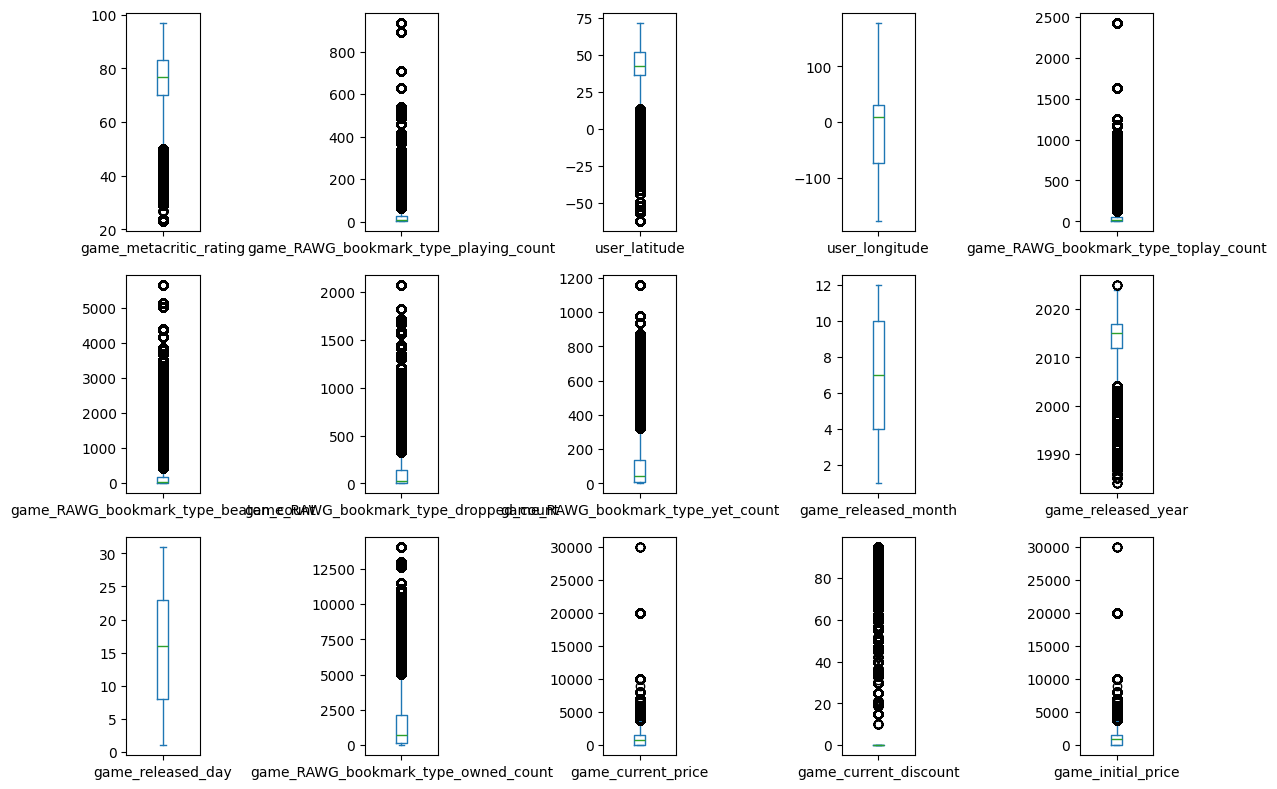

In [9]:
import matplotlib.pyplot as plt

train[train_column_with_missing].plot(kind = "box", layout = (3,5), subplots = True, figsize = (12,8))
plt.tight_layout();

In [10]:
train[train_column_with_missing].describe()

,game_metacritic_rating,game_RAWG_bookmark_type_playing_count,user_latitude,user_longitude,game_RAWG_bookmark_type_toplay_count,game_RAWG_bookmark_type_beaten_count,game_RAWG_bookmark_type_dropped_count,game_RAWG_bookmark_type_yet_count,game_released_month,game_released_year,game_released_day,game_RAWG_bookmark_type_owned_count,game_current_price,game_current_discount,game_initial_price
count,1120899.0,1.566662e+06,1.995898e+06,1.995898e+06,2.032902e+06,2.138953e+06,2.230332e+06,2.380739e+06,2.538722e+06,2.538722e+06,2.538722e+06,2.594651e+06,2.595685e+06,2.595685e+06,2.595685e+06
mean,75.773046,3.295568e+01,3.904899e+01,-1.095454e+00,5.629954e+01,2.514521e+02,1.285512e+02,1.068079e+02,6.708198e+00,2.014051e+03,1.595151e+01,1.646525e+03,1.062772e+03,4.052592e+00,1.117373e+03
std,10.128793,7.717644e+01,2.180901e+01,7.305202e+01,1.288675e+02,6.096308e+02,2.464309e+02,1.548387e+02,3.345577e+00,5.199679e+00,8.851583e+00,2.216632e+03,1.199890e+03,1.676354e+01,1.213177e+03
min,23.0,1.000000e+00,-6.219154e+01,-1.781389e+02,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.984000e+03,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,70.0,2.000000e+00,3.664855e+01,-7.400597e+01,3.000000e+00,4.000000e+00,5.000000e+00,9.000000e+00,4.000000e+00,2.012000e+03,8.000000e+00,1.910000e+02,9.900000e+01,0.000000e+00,9.900000e+01
50%,77.0,7.000000e+00,4.260519e+01,9.493053e+00,1.200000e+01,2.600000e+01,2.600000e+01,4.200000e+01,7.000000e+00,2.015000e+03,1.600000e+01,7.280000e+02,7.490000e+02,0.000000e+00,9.990000e+02
75%,83.0,2.700000e+01,5.191944e+01,3.031202e+01,5.300000e+01,1.710000e+02,1.350000e+02,1.350000e+02,1.000000e+01,2.017000e+03,2.300000e+01,2.118000e+03,1.499000e+03,0.000000e+00,1.499000e+03
max,97.0,9.360000e+02,7.170694e+01,1.780650e+02,2.424000e+03,5.651000e+03,2.076000e+03,1.160000e+03,1.200000e+01,2.025000e+03,3.100000e+01,1.406700e+04,2.999000e+04,9.500000e+01,2.999000e+04


In [11]:
# For those columns related to users' behaviors, we will use median to impute.
# Particularly, most of them are right skewed (which might be the game we are particularly interested in). Median can reduce the influence from these individuals.
median_impute_col = ["game_metacritic_rating","game_RAWG_bookmark_type_playing_count","game_RAWG_bookmark_type_toplay_count",
                     "game_RAWG_bookmark_type_beaten_count","game_RAWG_bookmark_type_dropped_count","game_RAWG_bookmark_type_yet_count","game_RAWG_bookmark_type_owned_count"]

In [12]:
# For those with latitude and longitude, we need to realize that the popularity of games is close to their market, which differs a lot from country to country.
# Thus, we will impute the missing values using the median of latitude/longitude under the same "user_country_code"

median_same_country_impute_col = ["user_latitude", "user_longitude"]

In [13]:
# For those with date, we do not have clear clue on the specific release time unless manual labelling. It is not feasible for this large dataset
len(train[train["game_released_year"].isnull()]["app_id"].unique())  # 1543 games do not have released date, which can hardly be labelled manually.

# Thus, we will use mode to represent the release time.
mode_impute_col = ["game_released_year", "game_released_month", "game_released_day"]

In [14]:
# For those with price, we will consider the impact of game platforms. Thus, we will use the median price according to each platform.

platform_col = []
for col in train.columns:
    if col.startswith("game_platforms_"):
        platform_col.append(col)

median_same_platform_impute_col = ['game_initial_price', "game_current_price"]

# Discount will be calculated accordingly

# Check each platform
print(train[platform_col].sum(), test[platform_col].sum())

# We noticed that column "game_platforms_Unknown" is always 0. Thus we do not need this column anymore.
train = train.drop("game_platforms_Unknown", axis = 1)
test = test.drop("game_platforms_Unknown", axis = 1)
platform_col = []
for col in train.columns:
    if col.startswith("game_platforms_"):
        platform_col.append(col)

game_platforms_3DO                      584
game_platforms_Android               246854
game_platforms_Apple Macintosh      1047494
game_platforms_Atari                   2431
game_platforms_Commodore / Amiga       6437
game_platforms_Linux                 718668
game_platforms_Neo Geo                 1321
game_platforms_Nintendo              494536
game_platforms_PC                   2595297
game_platforms_PlayStation           868224
game_platforms_SEGA                   14477
game_platforms_Unknown                    0
game_platforms_Web                    13831
game_platforms_Xbox                  818924
game_platforms_iOS                   355522
dtype: int64 game_platforms_3DO                     141
game_platforms_Android               64574
game_platforms_Apple Macintosh      277930
game_platforms_Atari                   643
game_platforms_Commodore / Amiga      1672
game_platforms_Linux                190709
game_platforms_Neo Geo                 292
game_platforms_Nintendo   

# Impute the missing value

Note that all the test data will be imputed using the median/mode of the train set to prevent data leakage.

In [15]:
from sklearn.impute import SimpleImputer

In [16]:
def impute_missing_vals(train, test, median_impute_col, median_same_country_impute_col, mode_impute_col, median_same_platform_impute_col,platform_col):
    '''This function will do imputing separately, including final calculation on the discount.'''

    train_2 = train.copy()
    test_2 = test.copy()
    
    # User action: directly filled with median of the train
    median_imputer = SimpleImputer(strategy = "median")
    train_2[median_impute_col] = median_imputer.fit_transform(train_2[median_impute_col])
    for col, med in zip(median_impute_col, median_imputer.statistics_):
        test_2[col]= test_2[col].fillna(med)

    # Longitude/latitude: filled by county
    for col in median_same_country_impute_col:
        fill_val = train_2.groupby("user_country_code")[col].median()
        
        # However, for some users, user_country_code is "Missing". 
        # We calculate the global median in case for a particular user_country_code, no data is available for median fill.
        global_median = train_2[col].median() 
        train_2[col] = train_2[col].fillna(train_2["user_country_code"].map(fill_val)) # fill by country first
        train_2[col] = train_2[col].fillna(global_median) # Then fill the rest using global median
        test_2[col] = test_2[col].fillna(test_2["user_country_code"].map(fill_val))
        test_2[col] = test_2[col].fillna(global_median)

    # Date/time: filled by mode 
    mode_imputer = SimpleImputer(strategy = "most_frequent")
    train_2[mode_impute_col] = mode_imputer.fit_transform(train_2[mode_impute_col])
    for col, mode in zip(mode_impute_col, mode_imputer.statistics_):
        test_2[col]= test_2[col].fillna(mode)

    # Price: by platform
    for platform in platform_col:
        train_2_sub = train_2[train_2[platform]>0]  # fillna by each platform individually
        test_2_sub = test_2[test_2[platform]>0]
        median_same_platform_imputer = SimpleImputer(strategy = "median")
        train_2.loc[train_2_sub.index, median_same_platform_impute_col] = median_same_platform_imputer.fit_transform(train_2_sub[median_same_platform_impute_col])
        for col, med in zip(median_same_platform_impute_col, median_same_platform_imputer.statistics_):
            test_2.loc[test_2_sub.index, col]= test_2.loc[test_2_sub.index, col].fillna(med)

    # We add 0.000001 to avoid dividing 0
    train_2["game_current_discount"] = round((train_2["game_initial_price"] - train_2["game_current_price"])/(train_2["game_initial_price"] + 0.000001)) 
    test_2["game_current_discount"] = round((test_2["game_initial_price"] - test_2["game_current_price"])/(test_2["game_initial_price"] + 0.000001)) 

    return train_2, test_2

In [17]:
train_2, test_2  = impute_missing_vals(train, test, median_impute_col, median_same_country_impute_col, 
                        mode_impute_col, median_same_platform_impute_col,platform_col)

In [18]:
train_2.isnull().values.any(), test_2.isnull().values.any()

(np.False_, np.False_)

In [19]:
# consistent dtype

for df in [train_2, test_2]:
    for col, dtype in zip(df.columns, df.dtypes):
        if dtype == 'Float64':
            df[col] = df[col].astype('float64')
        elif dtype == 'Int64':
            df[col] = df[col].astype('int64')
        elif dtype == 'boolean':
            df[col] = df[col].astype('bool')

In [20]:
train_2.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2595694 entries, 0 to 2595693
Data columns (total 140 columns):
 #    Column                                             Non-Null Count    Dtype  
---   ------                                             --------------    -----  
 0    user_id                                            2595694 non-null  object 
 1    app_id                                             2595694 non-null  int64  
 2    relevance_score                                    2595694 non-null  float64
 3    user_country_code                                  2595694 non-null  object 
 4    user_has_coordinates                               2595694 non-null  bool   
 5    user_latitude                                      2595694 non-null  float64
 6    user_longitude                                     2595694 non-null  float64
 7    user_account_age_months                            2595694 non-null  float64
 8    game_name                                         

In [21]:
test_2.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 694638 entries, 0 to 694637
Data columns (total 140 columns):
 #    Column                                             Non-Null Count   Dtype  
---   ------                                             --------------   -----  
 0    user_id                                            694638 non-null  object 
 1    app_id                                             694638 non-null  int64  
 2    relevance_score                                    694638 non-null  float64
 3    user_country_code                                  694638 non-null  object 
 4    user_has_coordinates                               694638 non-null  bool   
 5    user_latitude                                      694638 non-null  float64
 6    user_longitude                                     694638 non-null  float64
 7    user_account_age_months                            694638 non-null  float64
 8    game_name                                          694638 non-

In [22]:
joblib.dump(train_2, "../assets/combined/train_impute.pkl")
joblib.dump(test_2, "../assets/combined/test_impute.pkl")

['../assets/combined/test_impute.pkl']